In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

dir_data="../home-credit-default-risk"
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
#the file encode problem on macOS
app_train = pd.read_csv(f_app)

Path of read in data: ../home-credit-default-risk/application_train.csv


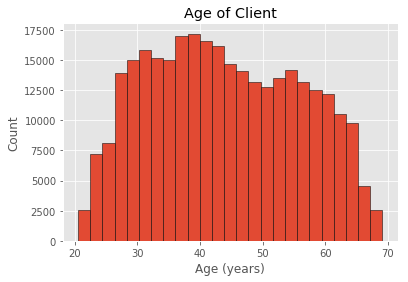

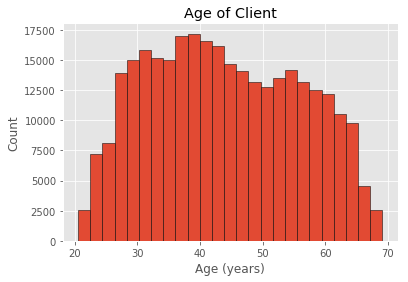

In [10]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

# 改變繪圖樣式 (style)
plt.style.use('ggplot') 

# 改變樣式後再繪圖一次, 比較效果
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

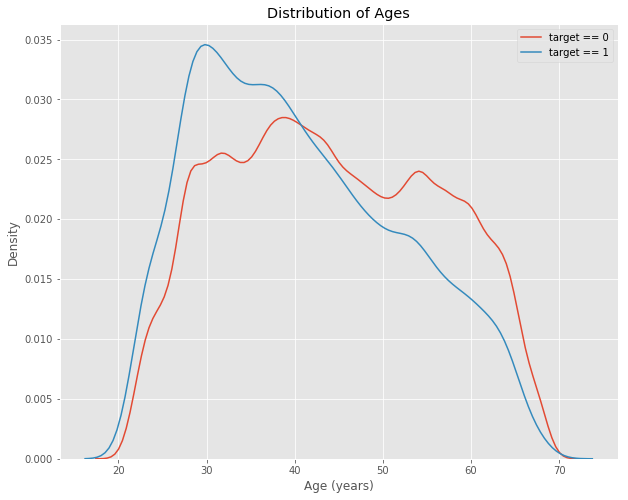

In [11]:
# 設定繪圖區域的長與寬
plt.figure(figsize = (10, 8))

# Kenel Density Estimation (KDE) plot: 會準時還貸者 - 下圖紅線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
# KDE plot: 不會準時還貸者 - 下圖藍線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# 設定標題與 X, y 軸的說明
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

# 輸出繪圖 : 有的ipynb環境, 會在一格結束時自動輸出繪圖, 但加上這行能保證在不同環境都會畫出圖形
plt.show()

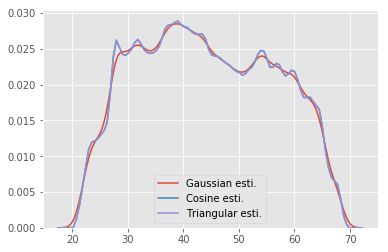

In [12]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Gaussian esti.', kernel='gau')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Cosine esti.', kernel='cos')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Triangular esti.', kernel='tri')
plt.show()

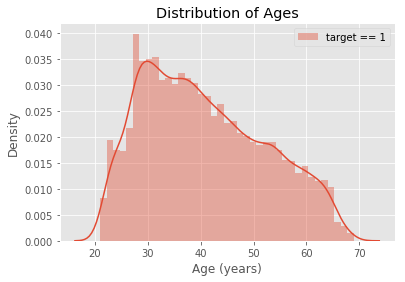

In [13]:
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
plt.legend()
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.show()

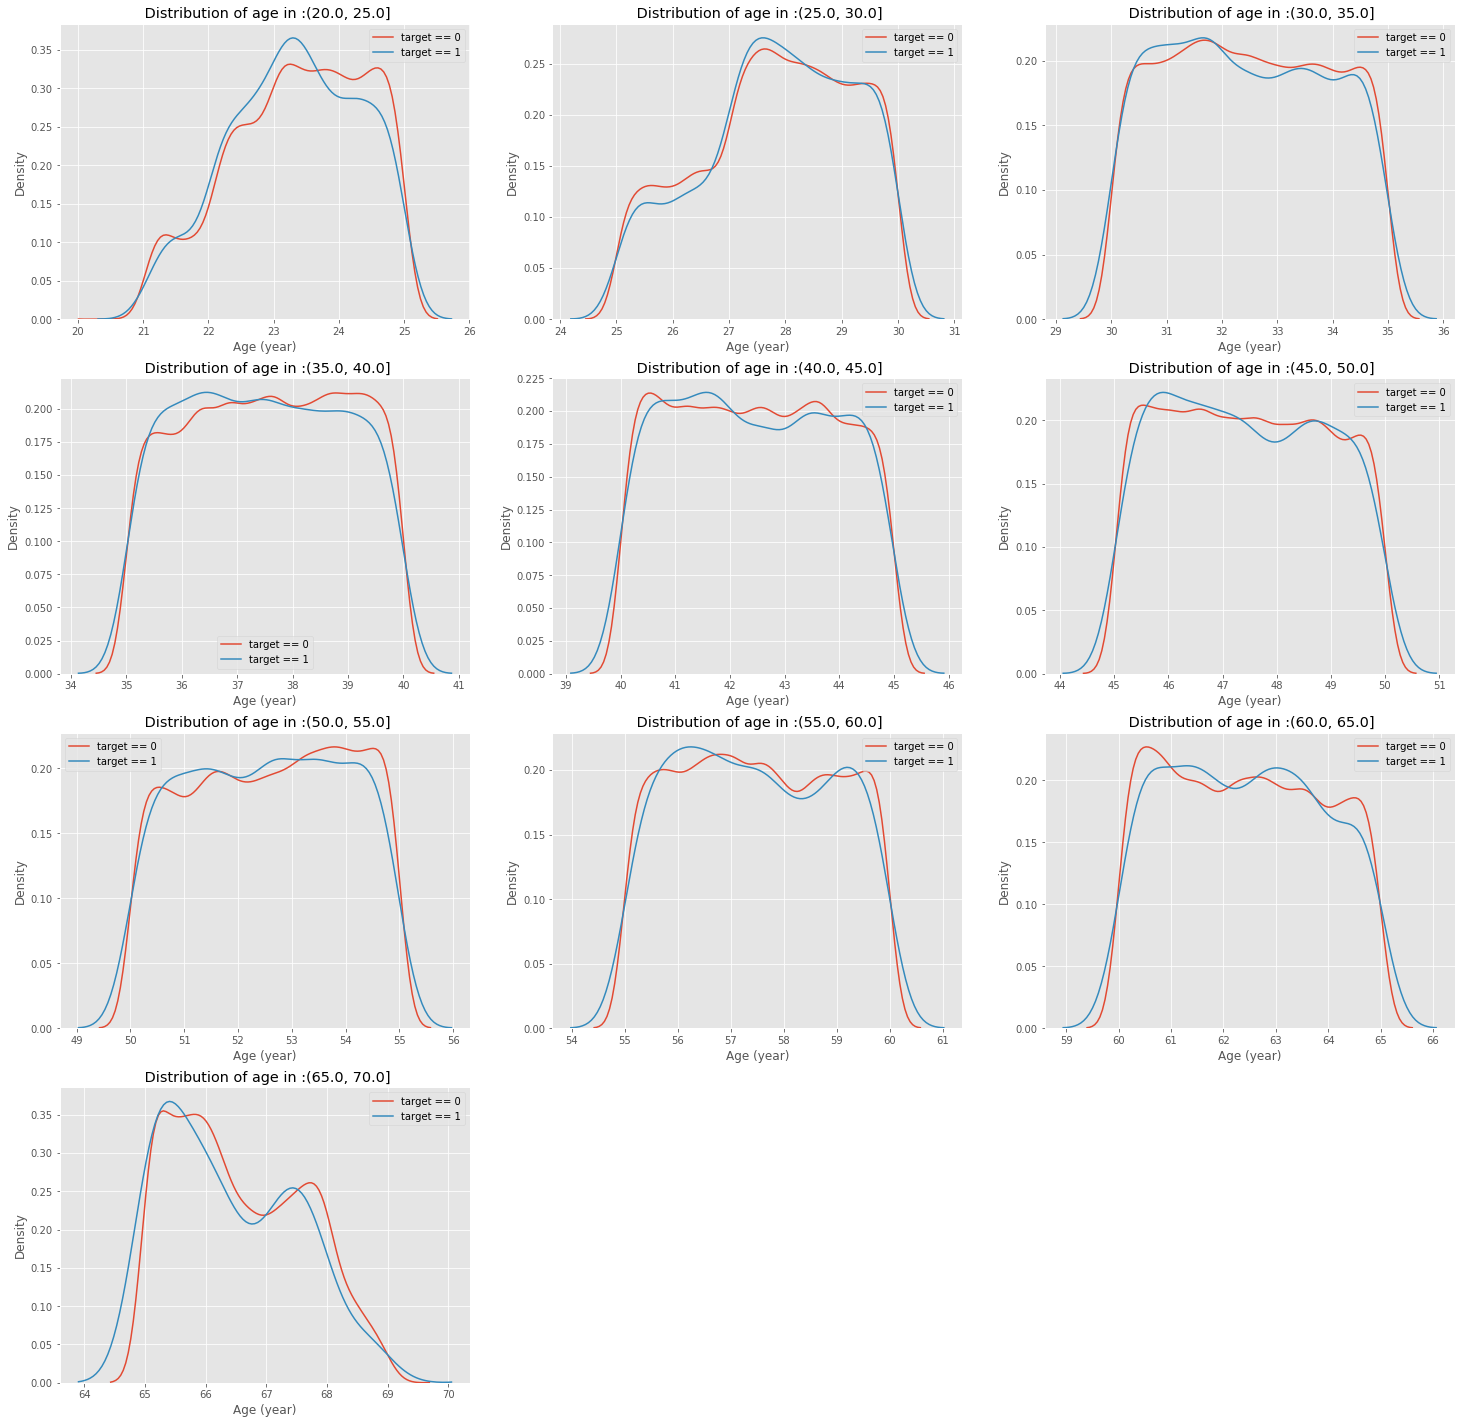

In [19]:
#Q1:自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
app_train.DAYS_BIRTH = abs(app_train.DAYS_BIRTH) / 365
#cuting div by 11
cutrange = np.linspace(20,70,11)

app_train['DAYS_BIRTH_GROUP'] = pd.cut(app_train.DAYS_BIRTH,cutrange,include_lowest = False)
intervals = app_train.DAYS_BIRTH_GROUP.unique().sort_values()

plt.figure(figsize = (25,25))
for i, cut in enumerate(intervals):
    plt.subplot(4,3,i+1)
    sub_df = app_train[app_train.DAYS_BIRTH_GROUP == cut]
    sns.kdeplot(sub_df.loc[ sub_df.TARGET == 0, 'DAYS_BIRTH']  ,label = 'target == 0')
    sns.kdeplot(sub_df.loc[ sub_df.TARGET == 1,  'DAYS_BIRTH']  ,label = 'target == 1')
    plt.xlabel('Age (year)'); plt.ylabel('Density')
    plt.title(' Distribution of age in :' + str(cut) )
plt.show()

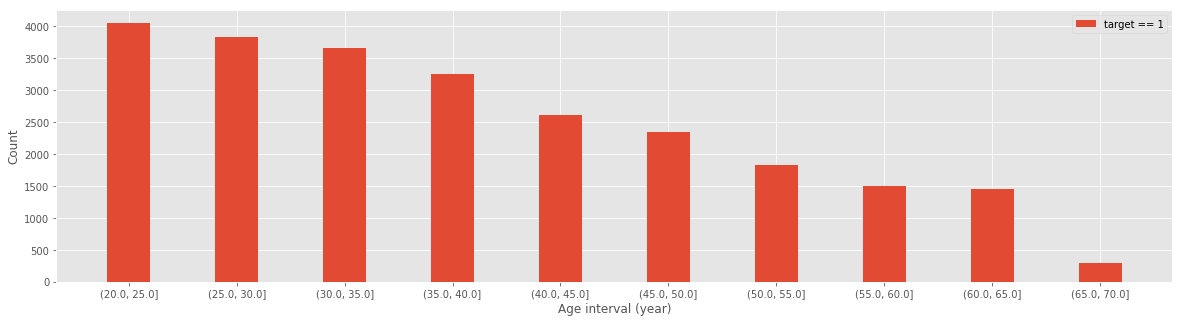

In [29]:
#2.以年齡區間為 x, target 為 y 繪製 barplot *

T1 = app_train.loc[app_train.TARGET == 1, 'DAYS_BIRTH_GROUP'].value_counts()
T0 =app_train.loc[app_train.TARGET == 0, 'DAYS_BIRTH_GROUP'].value_counts()
n_group = len(T0.index)
index = np.arange(n_group)

barWidth = 0.4
plt.figure(figsize = (20,5))
#plt.bar(index,T0.values,barWidth,label = 'target == 0')
plt.bar(index+barWidth,T1.values,barWidth, label = 'target == 1')
plt.xlabel('Age interval (year)')
plt.ylabel('Count')
plt.xticks(index+barWidth, np.array(intervals,dtype = str))
plt.legend()
plt.show()